In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer

import importlib

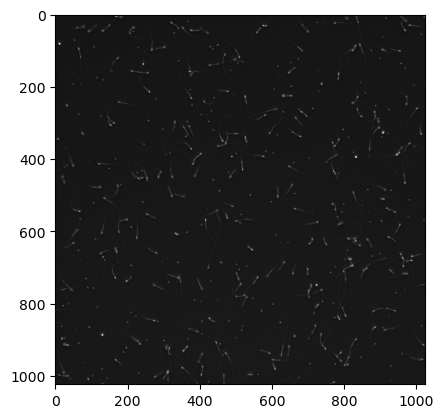

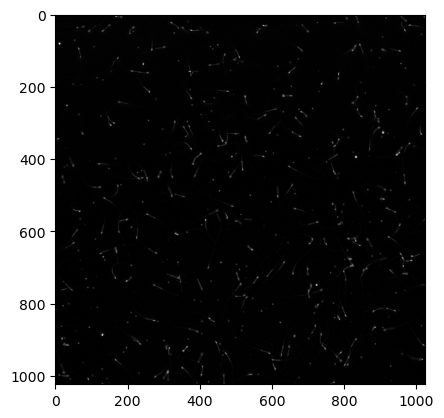

In [2]:
importlib.reload(tracker)

videofile = "ExampleVideos/10X_LD_1024_R1.avi"
#videofile = "ExampleVideos/20X_MD_R5.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame); plt.show()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mid_val = np.median(gray)
plt.imshow(np.abs(gray-mid_val),cmap='gray'); plt.show()



            y           x         mass      size       ecc      signal  \
3    5.935919  168.588954  1556.040135  2.003896  0.262931  118.080617   
8    7.583051  182.165537  1161.126071  2.428759  0.309587   61.664322   
39  23.714146  321.900147  1340.215007  2.255357  0.329420   80.688422   
42  24.303229  774.406678  1198.518266  2.190191  0.362884   81.344425   
50  30.312900  981.877859  1434.023497  2.306659  0.395218   86.592453   

    raw_mass        ep  
3     4666.0  0.012825  
8     4026.0  0.016676  
39    4291.0  0.014832  
42    4002.0  0.016866  
50    4440.0  0.013963  


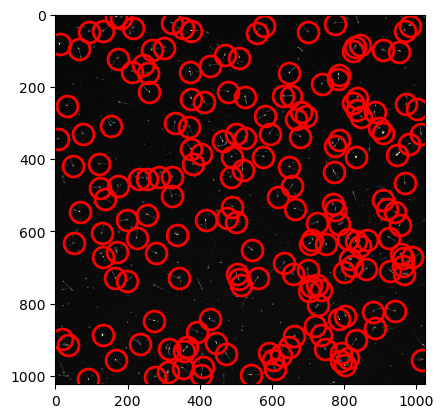

<Axes: >

In [33]:
importlib.reload(tracker)

import trackpy as tp

f = tp.locate(gray, 11, minmass=1000)
#f = tracker.determineCentroids_morphology(np.expand_dims(frame,0))

print(f.head())

# Visualize
tp.annotate(f, gray)

### Feed through the tracking pipeline

In [5]:
importlib.reload(tracker)

frames = tracker.load_video(videofile)
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

Frame 499: 419 trajectories present.


In [ ]:
final = tracker.segmentCells(frames, t)

print(final.head())

### Feed through the statistics pipeline

In [13]:
importlib.reload(stats)

stats_data = {}

# Calculate each statstic for each sperm
for i in range(len(track_data)):
    # Get the centroids
    centroids = track_data[i]['centroid']
    visible = track_data[i]['visible']

    average_speed = stats.calcAverageSpeed(centroids,visible)

    stats_data[i] = {}
    stats_data[i]["average_speed"] = average_speed

### Use Visualizations

In [14]:
importlib.reload(visualizer)

visualizer.runVisualization(videofile, track_data, stats_data, visualization="segments")

Video Finished.
